# Explore here

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import os
import pandas as pd
import seaborn as sns

# load the .env file variables
load_dotenv()



True

In [8]:
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [9]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [10]:
artist_id = "00FQb4jTyendYWaN8pK0wa"
response = sp.artist_top_tracks(artist_id)

In [11]:
iltered_tracks = []


if response and "tracks" in response:
    tracks = response["tracks"]

    
    filtered_tracks = []

    
    for track in tracks:
        
        track_info = {}

        
        for k, v in track.items():
            # Verifica si la clave es una de las que nos interesa
            if k in ["name", "popularity", "duration_ms"]:
                
                if k == "duration_ms":
                    track_info[k] = (v / (1000 * 60)) % 60
                else:
                    track_info[k] = v
        
        filtered_tracks.append(track_info)

    
    tracks = filtered_tracks

   
    print(tracks)

else:
    print("Error: No se pudo obtener las canciones principales del artista o la respuesta no contiene 'tracks'.")


[{'duration_ms': 4.412883333333333, 'name': 'Summertime Sadness', 'popularity': 72}, {'duration_ms': 3.9342166666666665, 'name': 'Young And Beautiful', 'popularity': 83}, {'duration_ms': 3.4859333333333336, 'name': 'Say Yes To Heaven', 'popularity': 83}, {'duration_ms': 5.011383333333334, 'name': 'Cinnamon Girl', 'popularity': 81}, {'duration_ms': 4.279333333333334, 'name': 'West Coast', 'popularity': 81}, {'duration_ms': 3.715333333333333, 'name': 'Diet Mountain Dew', 'popularity': 68}, {'duration_ms': 5.860666666666667, 'name': 'Brooklyn Baby', 'popularity': 80}, {'duration_ms': 4.6991, 'name': 'Video Games', 'popularity': 69}, {'duration_ms': 2.7451666666666665, 'name': 'White Mustang', 'popularity': 79}, {'duration_ms': 3.147133333333333, 'name': 'Tough', 'popularity': 79}]


In [12]:
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                name  popularity
5     3.715333   Diet Mountain Dew          68
7     4.699100         Video Games          69
0     4.412883  Summertime Sadness          72


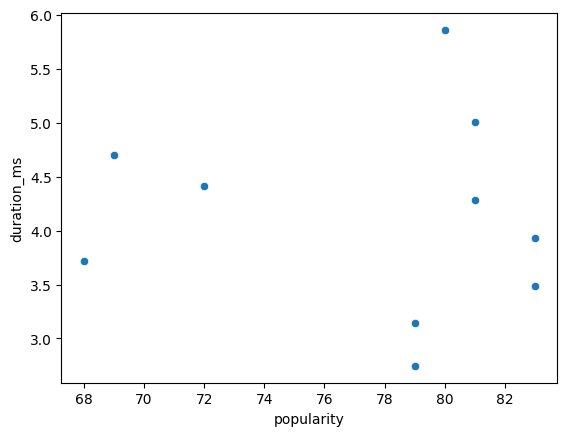

In [13]:
scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

Debido a la dispercion que existe entre la popularidad de las canciones con la duracion podemos concluir que no existe correlacion ni causalidad entre estas dos variables